### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t', index_col=0)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [7]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3107,3105,3099
unique,502,NaN,5,5,1426,3032,2814,3047
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [10]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [11]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [12]:
pd.get_dummies(df['effectiveness'])

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
2202,0,1,0,0,0
3117,0,1,0,0,0
1146,0,1,0,0,0
3947,0,0,0,1,0
1951,0,0,0,1,0
...,...,...,...,...,...
1039,0,1,0,0,0
3281,0,0,1,0,0
1664,0,0,0,1,0
2621,1,0,0,0,0


In [13]:
map_effectiveness = {'Ineffective':0,
                     'Marginally Effective':1,
                     'Moderately Effective':2,
                     'Considerably Effective':3,
                     'Highly Effective':4}

df['effectiveness_int'] = df['effectiveness'].map(map_effectiveness)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1


In [14]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [15]:
map_sideEffects = {'No Side Effects':0,
                    'Mild Side Effects':1,
                    'Moderate Side Effects':2,
                    'Severe Side Effects':3,
                    'Extremely Severe Side Effects':4}

df['sideEffects_int'] = df['sideEffects'].map(map_sideEffects)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3


In [16]:
X = df[['rating', 'effectiveness_int','sideEffects_int']]
X

,rating,effectiveness_int,sideEffects_int
2202,4,4,1
3117,1,4,3
1146,10,4,0
3947,3,1,1
1951,2,1,3
...,...,...,...
1039,10,4,1
3281,1,0,4
1664,2,1,2
2621,8,3,1


In [18]:
X.shape

(3107, 3)

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

#### Genera el K Means 

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [20]:
km_list = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range(2,30)]
km_list

[KMeans(n_clusters=2, random_state=0),
 KMeans(n_clusters=3, random_state=0),
 KMeans(n_clusters=4, random_state=0),
 KMeans(n_clusters=5, random_state=0),
 KMeans(n_clusters=6, random_state=0),
 KMeans(n_clusters=7, random_state=0),
 KMeans(random_state=0),
 KMeans(n_clusters=9, random_state=0),
 KMeans(n_clusters=10, random_state=0),
 KMeans(n_clusters=11, random_state=0),
 KMeans(n_clusters=12, random_state=0),
 KMeans(n_clusters=13, random_state=0),
 KMeans(n_clusters=14, random_state=0),
 KMeans(n_clusters=15, random_state=0),
 KMeans(n_clusters=16, random_state=0),
 KMeans(n_clusters=17, random_state=0),
 KMeans(n_clusters=18, random_state=0),
 KMeans(n_clusters=19, random_state=0),
 KMeans(n_clusters=20, random_state=0),
 KMeans(n_clusters=21, random_state=0),
 KMeans(n_clusters=22, random_state=0),
 KMeans(n_clusters=23, random_state=0),
 KMeans(n_clusters=24, random_state=0),
 KMeans(n_clusters=25, random_state=0),
 KMeans(n_clusters=26, random_state=0),
 KMeans(n_clusters=27,

In [21]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in km_list]
silhouette_score_list

[0.6190969508782411,
 0.4541665291694327,
 0.4174308457120984,
 0.4152173517501398,
 0.4116968068331206,
 0.3851674527566422,
 0.38263220528484304,
 0.41213488688579875,
 0.4220860008108672,
 0.4017472997872079,
 0.42504820644760716,
 0.42326839159430696,
 0.42641138717228616,
 0.44560409646520105,
 0.46351653870120185,
 0.4648232508907611,
 0.5286891211073612,
 0.4968401616405597,
 0.5088682707064438,
 0.5138675752475201,
 0.5228278140916189,
 0.5518251466051999,
 0.5553483027717168,
 0.5559656200408832,
 0.5913454428334154,
 0.6201350086665606,
 0.6185926662947265,
 0.6309253057864823]

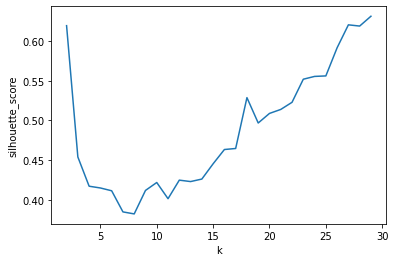

In [23]:
plt.plot(range(2,30), silhouette_score_list)
plt.xlabel('k')
plt.ylabel('silhouette_score');

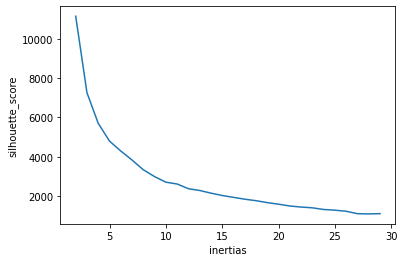

In [24]:
inertias = [model.inertia_ for model in km_list] 
plt.plot(range(2,30), inertias)
plt.xlabel('inertias')
plt.ylabel('silhouette_score');

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [34]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [35]:
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 0])

In [36]:
df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
df_clusters

,Cluster
0,0
1,0
2,1
3,0
4,0
...,...
3102,1
3103,0
3104,0
3105,1


In [37]:
df_clusters['Cluster'].value_counts()

1    2271
0     836
Name: Cluster, dtype: int64

<AxesSubplot:ylabel='Cluster'>

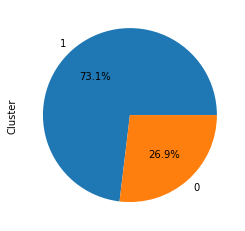

In [39]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [30]:
X['cluster'] = kmeans.labels_

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
X.groupby('cluster').mean()

,rating,effectiveness_int,sideEffects_int
cluster,,,
0,8.569615,3.422504,0.880473
1,2.667072,1.584447,2.482382


In [33]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
X['cluster'] = kmeans.labels_
X.groupby('cluster').mean()

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rating,effectiveness_int,sideEffects_int
cluster,,,
0,9.906634,3.920147,0.390663
1,1.728723,2.957447,3.281915
2,6.733696,2.345109,0.915761
3,1.340517,0.262931,3.288793
4,8.513021,3.397135,0.805990
5,4.570896,2.343284,2.000000
6,7.489426,3.438066,2.217523
7,2.521739,0.543478,0.942029
